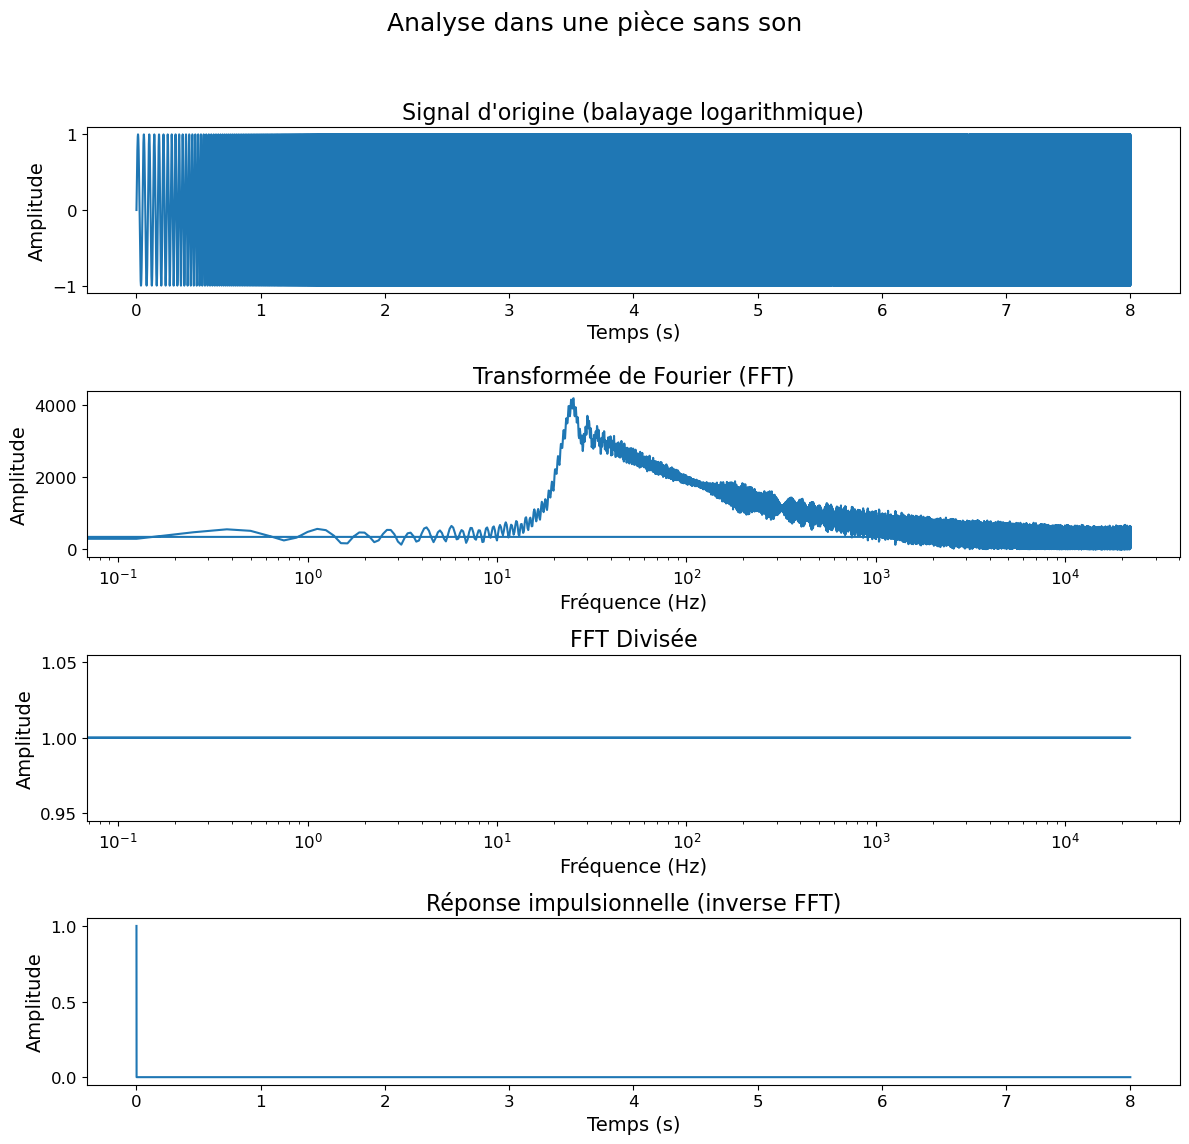

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
f_start = 20  # Fréquence de départ (Hz)
f_end = 20000  # Fréquence finale (Hz)
duration = 8  # Durée du signal (secondes)
fs = 44100  # Fréquence d'échantillonnage (Hz)

# Génération du signal à balayage logarithmique
t = np.linspace(0, duration, int(duration * fs), False)
f_t_log = np.logspace(np.log10(f_start), np.log10(f_end), len(t))
x_t_log = np.sin(2 * np.pi * f_t_log * t)

# Calcul de la FFT
fft_vals_log = np.fft.fft(x_t_log)
fft_freq_log = np.fft.fftfreq(len(t), 1 / fs)

# Division de la FFT par elle-même
fft_div = fft_vals_log / fft_vals_log

# Calcul de l'inverse de la FFT
rir = np.fft.ifft(fft_div)

# Tracé du signal d'origine, de la FFT et de la RIR
fig, axs = plt.subplots(4, 1, figsize=(12, 12))

axs[0].plot(t, x_t_log)
axs[0].set_title("Signal d'origine (balayage logarithmique)", fontsize=16)
axs[0].set_xlabel("Temps (s)", fontsize=14)
axs[0].set_ylabel("Amplitude", fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)

axs[1].plot(fft_freq_log, np.abs(fft_vals_log))
axs[1].set_title("Transformée de Fourier (FFT)", fontsize=16)
axs[1].set_xlabel("Fréquence (Hz)", fontsize=14)
axs[1].set_ylabel("Amplitude", fontsize=14)
axs[1].set_xscale('log')  # Échelle logarithmique pour les fréquences
axs[1].tick_params(axis='both', which='major', labelsize=12)

axs[2].plot(fft_freq_log, np.abs(fft_div))
axs[2].set_title("FFT Divisée", fontsize=16)
axs[2].set_xlabel("Fréquence (Hz)", fontsize=14)
axs[2].set_ylabel("Amplitude", fontsize=14)
axs[2].set_xscale('log')  # Échelle logarithmique pour les fréquences
axs[2].tick_params(axis='both', which='major', labelsize=12)

axs[3].plot(t, np.real(rir))
axs[3].set_title("Réponse impulsionnelle (inverse FFT)", fontsize=16)
axs[3].set_xlabel("Temps (s)", fontsize=14)
axs[3].set_ylabel("Amplitude", fontsize=14)
axs[3].tick_params(axis='both', which='major', labelsize=12)

plt.suptitle("Analyse dans une pièce sans son", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
